In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

**Train Data Loading**

In [3]:
df = pd.read_csv('data/train-test/data_sklearn_models.csv')
df.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.449019,1.375097,103.837619,0,0,0,0,0,0,...,0,0,0,0,-1.546558,-0.345484,-0.802967,-0.833389,-0.524994,-0.375705
1,0,12.524526,1.373922,103.855621,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.727997,-0.802967,-0.167970,-0.582020,0.258150
2,0,12.560244,1.373552,103.838169,0,0,0,0,0,0,...,0,0,0,0,-1.172367,-0.804500,-0.802967,-0.899113,-0.565965,-0.375705
3,0,12.577636,1.367761,103.855357,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.881003,-0.802967,-0.296103,-0.738546,-0.133931
4,2,12.577636,1.371626,103.857736,0,0,0,0,0,0,...,0,0,0,0,-1.213944,-0.804500,-0.802967,-0.044030,-0.637076,0.258150


**Train Data Overview**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206315 entries, 0 to 206314
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   storey_range                       206315 non-null  int64  
 1   resale_price                       206315 non-null  float64
 2   latitude                           206315 non-null  float64
 3   longitude                          206315 non-null  float64
 4   town_BEDOK                         206315 non-null  int64  
 5   town_BISHAN                        206315 non-null  int64  
 6   town_BUKIT BATOK                   206315 non-null  int64  
 7   town_BUKIT MERAH                   206315 non-null  int64  
 8   town_BUKIT PANJANG                 206315 non-null  int64  
 9   town_BUKIT TIMAH                   206315 non-null  int64  
 10  town_CENTRAL AREA                  206315 non-null  int64  
 11  town_CHOA CHU KANG                 2063

**Data Splitting**

In [5]:
y_values = df['resale_price']
X_values = df.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 49) (41263, 49)
(165052,) (41263,)


In [22]:
X_test.columns

Index(['storey_range', 'latitude', 'longitude', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_model_Apartment',
       'flat_model_DBSS', 'flat_model_Improved', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A2',
       'flat_model_New Generation', 'flat_model_Others',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace',
       'flat_model_Type S1', 'flat_model_Type S2', 'floor_area_sqm',
       'rem

**Load 2024 Data for Prediction**

In [33]:
data_2024 = pd.read_csv('data/train-test/2024-data.csv')
data_2024 = data_2024.drop('year', axis=1)
data_2024.head()

,storey_range,resale_price,latitude,longitude,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd,poi_vector_average
0,2,12.570716,1.373346,103.836459,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.607778,2.175147,-0.970227,-0.563772,-0.375705
1,1,12.683858,1.373401,103.849073,0,0,0,0,0,0,...,0,0,0,0,-2.211786,-1.448652,2.175147,-0.345136,-0.596351,-0.340607
2,0,13.161584,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
3,8,13.384728,1.365266,103.844538,0,0,0,0,0,0,...,0,0,0,0,-1.130791,1.012438,2.175147,-0.810390,-0.795211,0.634423
4,1,12.747815,1.366048,103.838123,0,0,0,0,0,0,...,0,0,0,0,-1.255521,-1.639909,2.175147,-0.940479,-0.753589,0.053899


In [34]:
pred_target = data_2024['resale_price']
pred_set = data_2024.drop('resale_price', axis=1)

**Out-of-bag method**

In [7]:
rf = RandomForestRegressor(random_state = 42, oob_score=True)
rf.fit(X_train, y_train)

R2 score: 0.9632128715316759
Out-of-bag score: 0.962850256266572


In [48]:
oob_prediction_test = rf.predict(X_test)
oob_r2 = rf.score(X_test, y_test)
oob_rmse = root_mean_squared_error(y_test, oob_prediction_test)
oob_mse = mean_squared_error(y_test, oob_prediction_test)
oob_mae = mean_absolute_error(y_test, oob_prediction_test)
oob_mape = mean_absolute_percentage_error(y_test, oob_prediction_test)
print('Train data R2 score:', oob_r2)
print("Train data Root Mean Squared Error:", oob_rmse)
print("Train data Mean Squared Error:", oob_mse)
print("Train data Mean Absolute Error:", oob_mae)
print("Train data Mean Absolute Percentage Error:", oob_mape)
print('Train data Out-of-bag score:', rf.oob_score_)

Train data R2 score: 0.9632128715316759
Train data Root Mean Squared Error: 0.06302164435547422
Train data Mean Squared Error: 0.003971727657267876
Train data Mean Absolute Error: 0.045790328356110986
Train data Mean Absolute Percentage Error: 0.0035199504994591598
Train data Out-of-bag score: 0.962850256266572


In [51]:
oob_prediction_2024 = rf.predict(pred_set)

In [52]:
oob_pred_r2 = r2_score(pred_target, oob_prediction_2024)
oob_pred_rmse = root_mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mse = mean_squared_error(pred_target, oob_prediction_2024)
oob_pred_mae = mean_absolute_error(pred_target, oob_prediction_2024)
oob_pred_mape = mean_absolute_percentage_error(pred_target, oob_prediction_2024)
print("Prediction data R2 score:", oob_pred_r2)
print("Prediction data Root Mean Squared Error:", oob_pred_rmse)
print("Prediction data Mean Squared Error:", oob_pred_mse)
print("Prediction data Mean Absolute Error:", oob_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", oob_pred_mape)

Prediction data R2 score: 0.9483626761381727
Prediction data Root Mean Squared Error: 0.06771429310843052
Prediction data Mean Squared Error: 0.004585225491174442
Prediction data Mean Absolute Error: 0.04806734802491651
Prediction data Mean Absolute Percentage Error: 0.003622187666393587


**K-fold Cross Validation**

In [50]:
param_grid = {
    'max_features': [500],
    'max_depth': [20],
    'min_samples_split': [15],
    'min_samples_leaf': [2]}
rfr =GridSearchCV(RandomForestRegressor(n_estimators = 500, n_jobs=-1, random_state=0),
                        param_grid, cv=10, scoring='r2', return_train_score=True)
rfr.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                             random_state=0),
             param_grid={'max_depth': [20], 'max_features': [500],
                         'min_samples_leaf': [2], 'min_samples_split': [15]},
             return_train_score=True, scoring='r2')

In [53]:
print("Best parameters set found on Cross Validation:", rfr.best_params_)
print("Cross Validation R2 score:", rfr.best_score_.round(3))

Best parameters set found on Cross Validation: {'max_depth': 20, 'max_features': 500, 'min_samples_leaf': 2, 'min_samples_split': 15}
Cross Validation R2 score: 0.956


In [54]:
cv_predicted_test = rfr.predict(X_test)
cv_r2 = rfr.score(X_test, y_test)
cv_rmse = root_mean_squared_error(y_test, cv_predicted_test)
cv_mse = mean_squared_error(y_test, cv_predicted_test)
cv_mae = mean_absolute_error(y_test, cv_predicted_test)
cv_mape = mean_absolute_percentage_error(y_test, cv_predicted_test)
print('Training data R2 score:', cv_r2)
print("Training data Root Mean Squared Error:", cv_rmse)
print("Training data Mean Squared Error:", cv_mse)
print("Training data Mean Absolute Error:", cv_mae)
print("Training data Mean Absolute Percentage Error:", cv_mape)

Training data R2 score: 0.9561578291862447
Training data Root Mean Squared Error: 0.06879990063001432
Training data Mean Squared Error: 0.004733426326699844
Training data Mean Absolute Error: 0.05036832856080737
Training data Mean Absolute Percentage Error: 0.0038709310746525426


In [55]:
cv_prediction_2024 = rfr.predict(pred_set)

cv_pred_r2 = r2_score(pred_target, cv_prediction_2024)
cv_pred_rmse = root_mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mse = mean_squared_error(pred_target, cv_prediction_2024)
cv_pred_mae = mean_absolute_error(pred_target, cv_prediction_2024)
cv_pred_mape = mean_absolute_percentage_error(pred_target, cv_prediction_2024)
print("Prediction data R2 score:", cv_pred_r2)
print("Prediction data Root Mean Squared Error:", cv_pred_rmse)
print("Prediction data Mean Squared Error:", cv_pred_mse)
print("Prediction data Mean Absolute Error:", cv_pred_mae)
print("Prediction data Mean Absolute Percentage Error:", cv_pred_mape)

Prediction data R2 score: 0.9436828335621916
Prediction data Root Mean Squared Error: 0.07071619480426039
Prediction data Mean Squared Error: 0.005000780207594104
Prediction data Mean Absolute Error: 0.05064748373528474
Prediction data Mean Absolute Percentage Error: 0.00381329979406148


**Comparison of OOB and K-fold Cross Validation**

On Training Data

C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\521528116.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\521528116.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\521528116.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\521528116.py:16: UserWarning: set_tickla

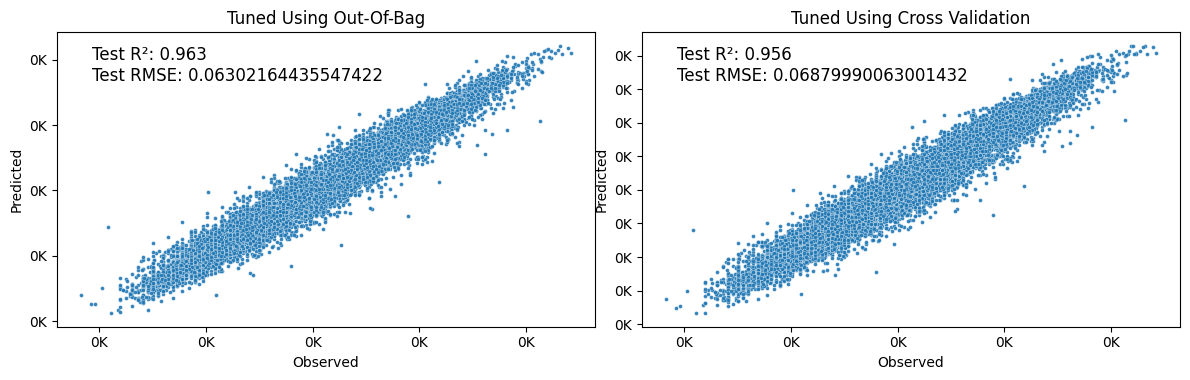

In [56]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=y_test, y=oob_prediction_test, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_r2,3)) + '\nTest RMSE: ' + str(oob_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=y_test, y=cv_predicted_test, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_r2,3)) + '\nTest RMSE: ' + str(cv_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

On Prediction Data

C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\4243487350.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\4243487350.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\4243487350.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\4243487350.py:16: UserWarning: set_ti

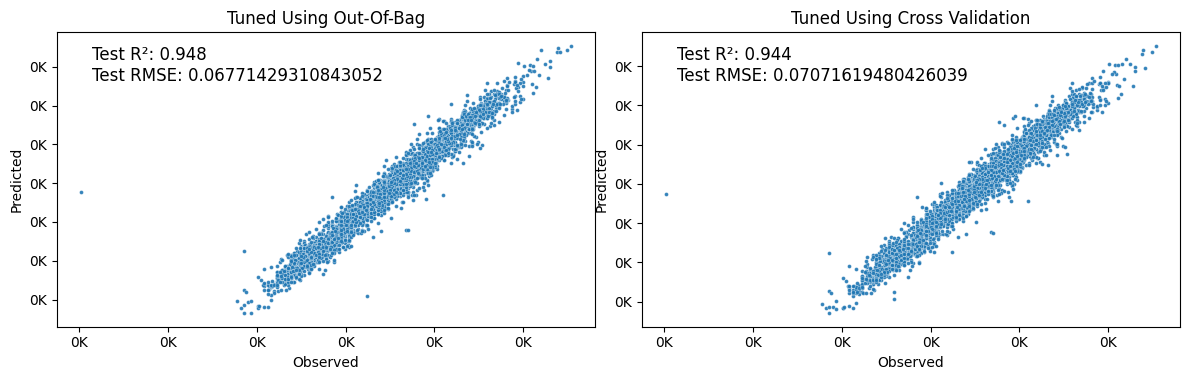

In [57]:
# scatterplots of y (observed) and y (predicted)

fig = plt.figure(figsize=(13,4))

ax1 = plt.subplot(121)
ax1 = sns.scatterplot(x=pred_target, y=oob_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Observed'), ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()/1000])
ax1.set_ylabel('Predicted'), ax1.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000])
ax1.annotate('Test R\u00b2: ' + str(round(oob_pred_r2,3)) + '\nTest RMSE: ' + str(oob_pred_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Tuned Using Out-Of-Bag')

ax2 = plt.subplot(122)
ax2 = sns.scatterplot(x=pred_target, y=cv_prediction_2024, edgecolors='w', alpha=0.9, s=8)
ax2.set_xlabel('Observed'), ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()/1000])
ax2.set_ylabel('Predicted'), ax2.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000])
ax2.annotate('Test R\u00b2: ' + str(round(cv_pred_r2,3)) + '\nTest RMSE: ' + str(cv_pred_rmse), xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax2.set_title('Tuned Using Cross Validation')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

**Feature Importances**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7252\875511087.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


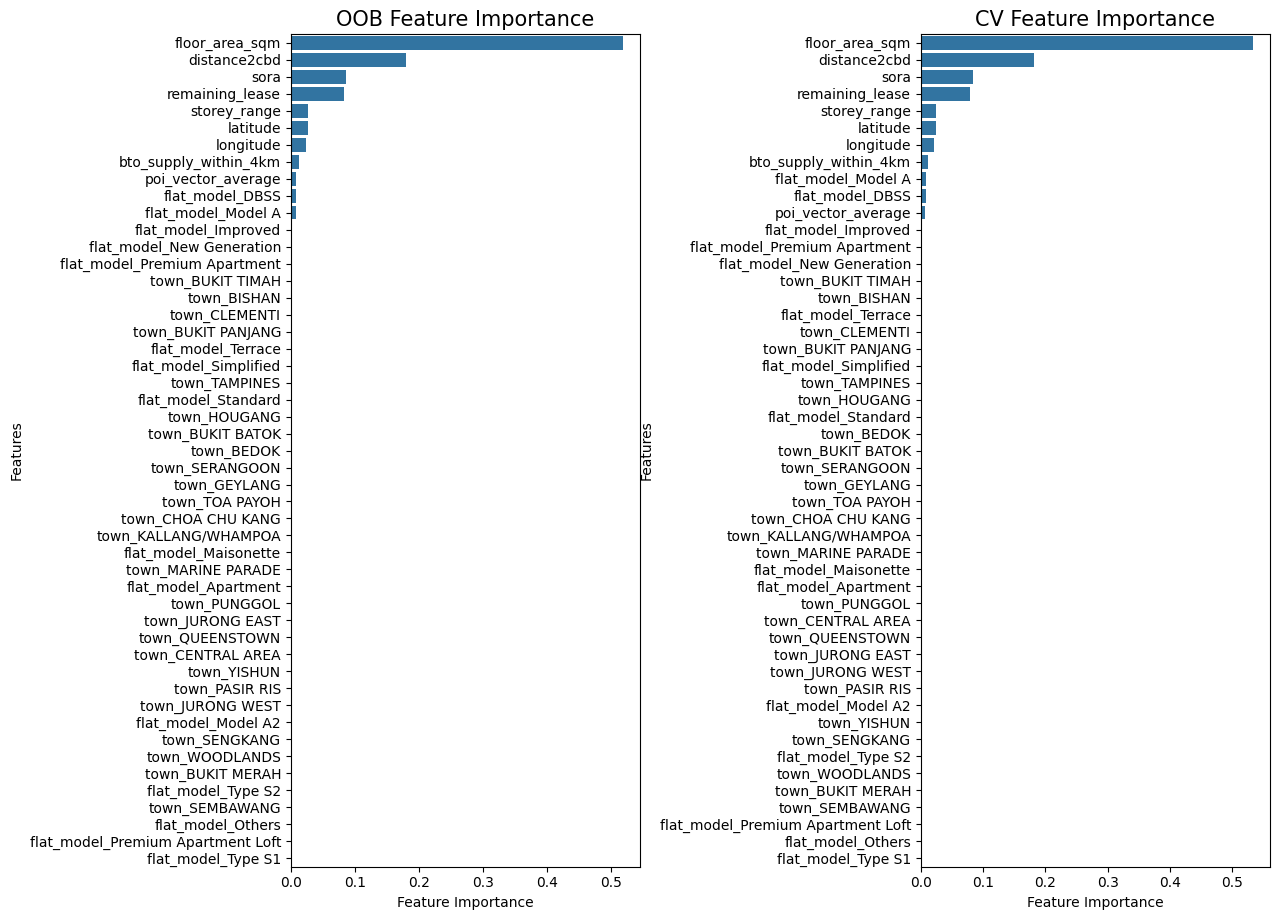

In [40]:
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('OOB Feature Importance', size=15)

ax2 = plt.subplot(122)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rfr.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
ax2.set_title('CV Feature Importance', size=15)

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()